<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 7 (midnight), 2024 -->

# Project 1 on Machine Learning, deadline October 7 (midnight), 2024
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **September 2**

### Libraries

In [1]:
# Linear algebra and numerical operations
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

# Random number generation
from random import random, seed

# Warnings
import warnings
warnings.filterwarnings("ignore")

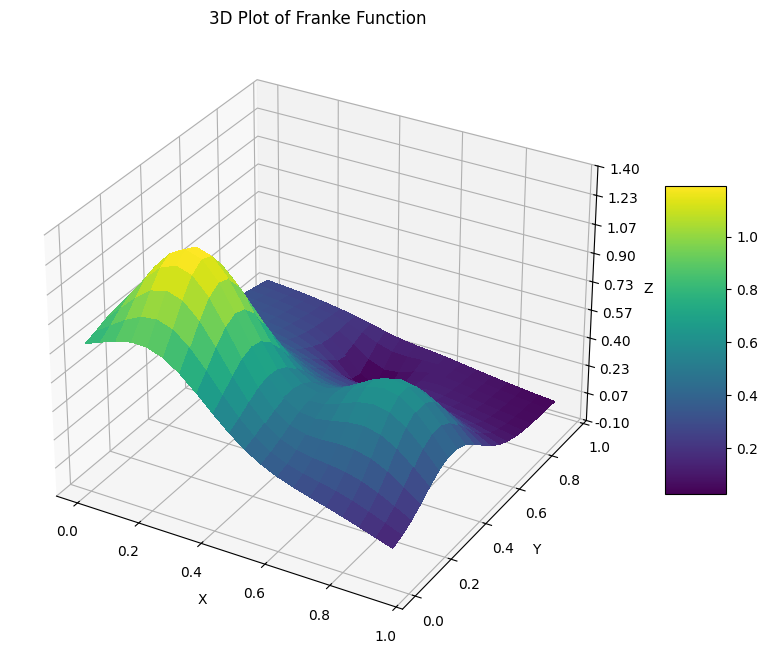

In [2]:
%matplotlib inline

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Make data.
x = np.arange(0, 1, 0.05) # here we dont have noise, we need to add it 
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_title('3D Plot of Franke Function', fontsize=12)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Part c): Adding Lasso for the Franke function

This exercise is essentially a repeat of the previous two ones, but now
with Lasso regression. Write either your own code (difficult and optional) or, in this case,
you can also use the functionalities of **Scikit-Learn** (recommended). Keep in mind that the library **Scikit-Learn** excludes the intercept by default. 
Give a
critical discussion of the three methods and a judgement of which
model fits the data best.

In [3]:
def design_matrix(x, y, degree):
    N = len(x)
    l = int((degree + 1) * (degree + 2) / 2)  # Number of terms in poly
    X = np.ones((N, l)) # --> we use ones matrix as starting point
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X[:, j] = (x**(i-j)) * (y**j)
    return X

def mse_and_r2_sk(y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    return mse, r2

### Without Scaling

In [4]:
# First we need to add some noise to our function as request from the exercise

np.random.seed(2745)
n = 1000 # --> we add stochastic noise using a normal distrib. N(0,1)
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + 0.1 * np.random.normal(0, 1, n)

degree = 5
max_degree = 15
lambdas = np.logspace(-5, 5, 20) 

In [5]:
# We create a function to determine the best lambdas to use

def best_lambdas_Lasso(X_train_val, z_train_val, lambdas):
    X_train, X_validation, z_train, z_validation = train_test_split(X_train_val, z_train_val, test_size=0.1, random_state=10)
    MSE_train_Lasso = []
    MSE_test_Lasso = []
    R2_train_Lasso = []
    R2_test_Lasso = []

    for l in range(len(lambdas)):
        model_Lasso = Lasso(alpha = lambdas[l], fit_intercept=False)
        model_Lasso.fit(X_train, z_train)
        z_train_pred_Lasso = model_Lasso.predict(X_train)
        z_test_pred_Lasso = model_Lasso.predict(X_validation)

        mse_train, r2_train = mse_and_r2_sk(z_train, z_train_pred_Lasso)
        mse_validation, r2_validation = mse_and_r2_sk(z_validation, z_test_pred_Lasso)
        
        MSE_train_Lasso.append(mse_train)
        MSE_test_Lasso.append(mse_validation)
        R2_train_Lasso.append(r2_train)
        R2_test_Lasso.append(r2_validation)

    best_index = np.argmin(MSE_test_Lasso)
    best_alpha = lambdas[best_index]
    min_MSE = MSE_test_Lasso[best_index]
    return best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train_Lasso, R2_test_Lasso

The best value of alpha with Scikit-Learn is: 0.01438 with a minimum MSE of: 0.18193


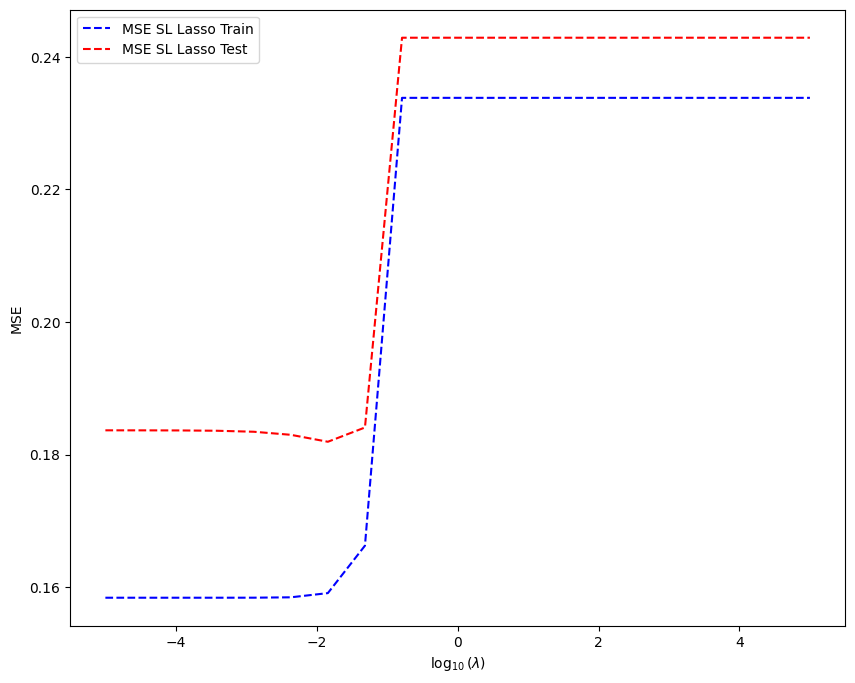

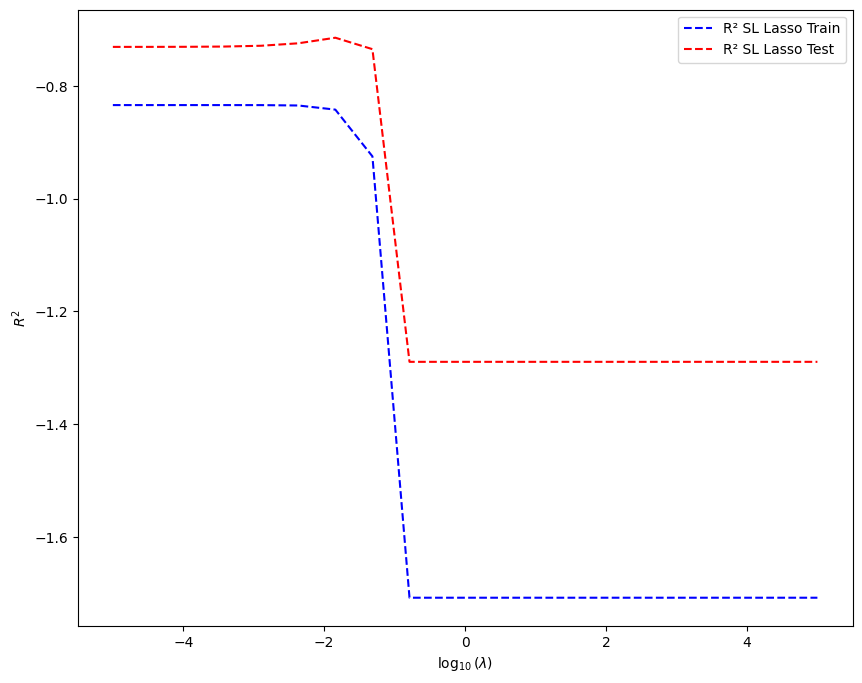

In [6]:
X = np.column_stack((x, y))
# --------------------------------- Scikit-learn ---------------------------------
X_train_val, X_test, z_train_val, z_test = train_test_split(X, z, test_size=0.1)
best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train_Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_val, z_train_val, lambdas)
print(f'The best value of alpha with Scikit-Learn is: {best_alpha:.5f} with a minimum MSE of: {min_MSE:.5f}')

poly = PolynomialFeatures(degree = degree)
X_poly = poly.fit_transform(X)
model_Lasso = Lasso(alpha = best_alpha, fit_intercept=False)
model_Lasso.fit(X_poly, z)
z_pred_sklearn = model_Lasso.predict(X_poly)

# --------------------------------- Plot results ---------------------------------
plt.figure(figsize = (10, 8))
plt.plot(np.log10(lambdas), MSE_train_Lasso, 'b--', label = 'MSE SL Lasso Train')
plt.plot(np.log10(lambdas), MSE_test_Lasso, 'r--', label = 'MSE SL Lasso Test')
plt.xlabel(r'$\log_{10}(\lambda)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.figure(figsize = (10, 8))
plt.plot(np.log10(lambdas), R2_train_Lasso, 'b--', label = 'R² SL Lasso Train')
plt.plot(np.log10(lambdas), R2_test_Lasso, 'r--', label = 'R² SL Lasso Test')
plt.xlabel(r'$\log_{10}(\lambda)$')
plt.ylabel(r'$R^2$')
plt.legend()
plt.show()

Lasso Mean Squared Error (MSE):	0.04305 
Lasso R²:			0.51018


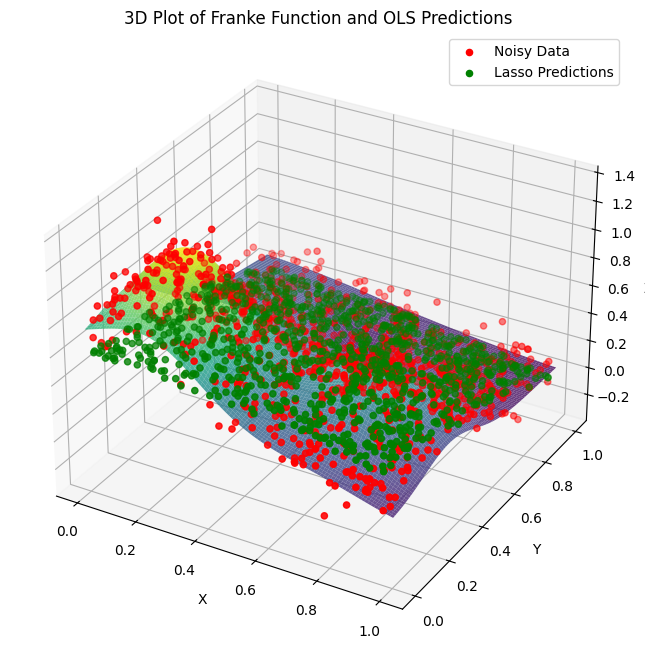

In [7]:
mse_sklearn, r2_sklearn = mse_and_r2_sk(z, z_pred_sklearn)
print(f"Lasso Mean Squared Error (MSE):\t{mse_sklearn:.5f} \nLasso R²:\t\t\t{r2_sklearn:.5f}")

# --------------------------------- Plot results ---------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z_surf = FrankeFunction(x_surf, y_surf)
ax.plot_surface(x_surf, y_surf, z_surf, cmap='viridis', alpha=0.8, rstride=1, cstride=1)
ax.scatter(x, y, z, color='r', label='Noisy Data') # --> data from Franke's function with noise
ax.scatter(x, y, z_pred_sklearn, color='g', label='Lasso Predictions') # --> Lasso predictions
ax.set_title('3D Plot of Franke Function and OLS Predictions', fontsize=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()

Degree: 1 	Train MSE: 0.0330 	Test MSE: 0.0422 	Train R²: 0.6182 	Test R²: 0.5814 	Alpha: -2.37
Degree: 2 	Train MSE: 0.0256 	Test MSE: 0.0370 	Train R²: 0.7032 	Test R²: 0.6333 	Alpha: -5.0
Degree: 3 	Train MSE: 0.0178 	Test MSE: 0.0251 	Train R²: 0.7935 	Test R²: 0.7510 	Alpha: -5.0
Degree: 4 	Train MSE: 0.0174 	Test MSE: 0.0237 	Train R²: 0.7984 	Test R²: 0.7654 	Alpha: -5.0
Degree: 5 	Train MSE: 0.0174 	Test MSE: 0.0236 	Train R²: 0.7984 	Test R²: 0.7657 	Alpha: -5.0
Degree: 6 	Train MSE: 0.0171 	Test MSE: 0.0233 	Train R²: 0.8021 	Test R²: 0.7688 	Alpha: -5.0
Degree: 7 	Train MSE: 0.0167 	Test MSE: 0.0230 	Train R²: 0.8065 	Test R²: 0.7721 	Alpha: -5.0
Degree: 8 	Train MSE: 0.0164 	Test MSE: 0.0227 	Train R²: 0.8104 	Test R²: 0.7753 	Alpha: -5.0
Degree: 9 	Train MSE: 0.0161 	Test MSE: 0.0224 	Train R²: 0.8134 	Test R²: 0.7783 	Alpha: -5.0
Degree: 10 	Train MSE: 0.0159 	Test MSE: 0.0221 	Train R²: 0.8158 	Test R²: 0.7811 	Alpha: -5.0
Degree: 11 	Train MSE: 0.0158 	Test MSE: 0.0219 

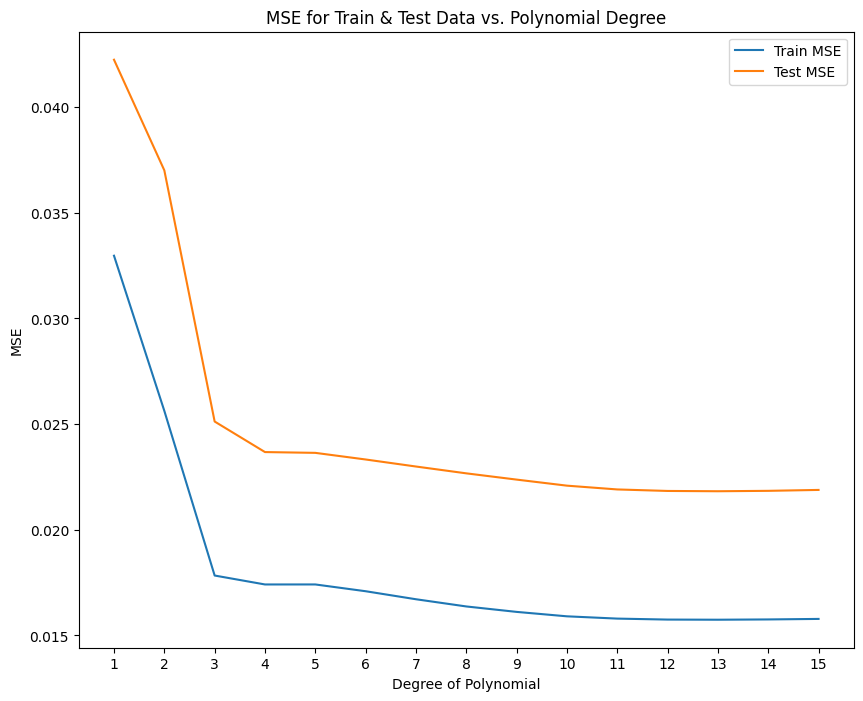

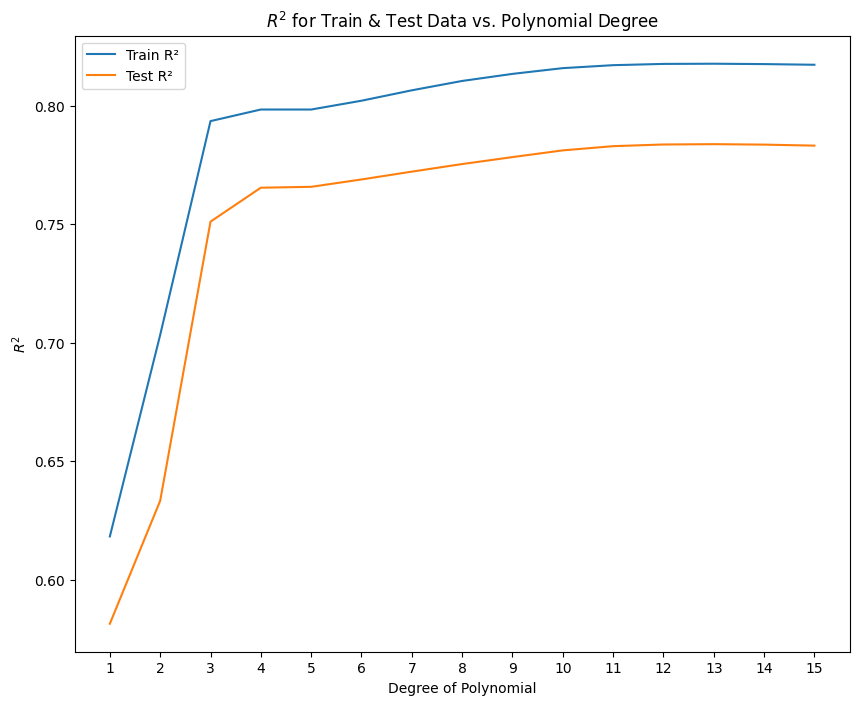

In [8]:
mse_train_values = np.zeros(max_degree)
mse_test_values = np.zeros(max_degree)
r2_train_values = np.zeros(max_degree)
r2_test_values = np.zeros(max_degree)
best_alpha_log = np.zeros(max_degree)

X = np.column_stack((x, y)) # --> this is important, we need to merge x and y
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=10)

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train__Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_poly, z_train, lambdas)
    model_Lasso = Lasso(alpha = best_alpha, fit_intercept=False)
    model_Lasso.fit(X_train_poly, z_train)
    
    z_train_pred = model_Lasso.predict(X_train_poly)
    z_test_pred = model_Lasso.predict(X_test_poly)
    
    mse_train, r2_train = mse_and_r2_sk(z_train, z_train_pred)
    mse_test, r2_test = mse_and_r2_sk(z_test, z_test_pred)
    
    mse_train_values[degree - 1] = mse_train
    mse_test_values[degree - 1] = mse_test
    r2_train_values[degree - 1] = r2_train
    r2_test_values[degree - 1] = r2_test
    best_alpha_log [degree - 1] = np.log10(best_alpha).round(2)
    
    print(f"Degree: {degree} \tTrain MSE: {mse_train_values[degree-1]:.4f} \tTest MSE: {mse_test_values[degree-1]:.4f} \tTrain R²: {r2_train_values[degree-1]:.4f} \tTest R²: {r2_test_values[degree-1]:.4f} \tAlpha: {best_alpha_log[degree-1]}")

best_degree = np.argmin(mse_test_values)
alpha = best_alpha_log[best_degree]
MSE = mse_test_values[best_degree]
print(f"\nThe best combination is obtained with Degree = {best_degree + 1} and an alpha value = {alpha}, we obtain an MSE test of {MSE:.4f}")


# --------------------------------- Plot results ---------------------------------
# Plotting MSE Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE')
plt.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.xticks(ticks=range(1,16))
plt.title('MSE for Train & Test Data vs. Polynomial Degree')
plt.legend()
plt.show()

# Plotting R2 Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), r2_train_values, label='Train R²')
plt.plot(range(1, max_degree + 1), r2_test_values, label='Test R²')
plt.xlabel('Degree of Polynomial')
plt.ylabel(r"$R^2$")
plt.xticks(ticks=range(1,16))
plt.title(r"$R^2$" + f' for Train & Test Data vs. Polynomial Degree')
plt.legend()
plt.show()

### Scaling

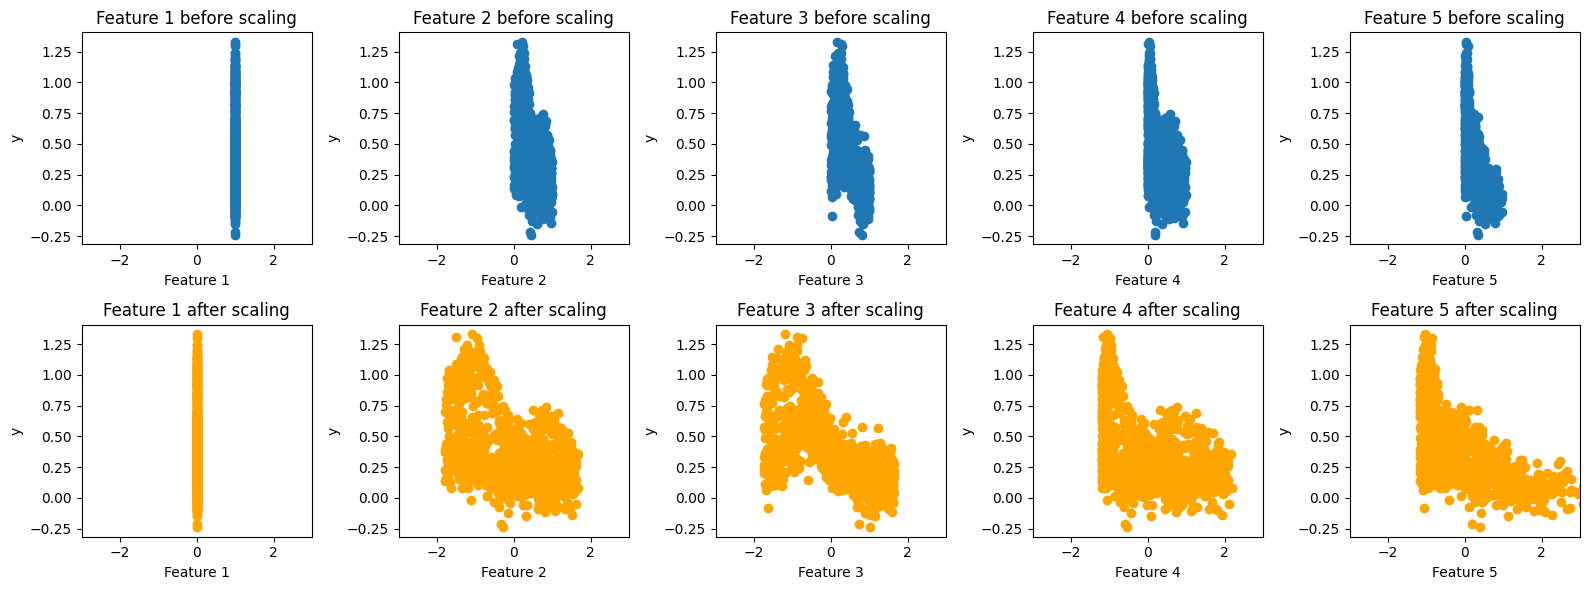

In [9]:
X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=10)
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_poly)
X_test_scaled = scaler_X.transform(X_test_poly)

scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

# --------------------------------- Plot results ---------------------------------
# Plot before scaling
n_features = 5
plt.figure(figsize=(16, 6))
x_limits = [(-3, 3)] * 5

for i in range(n_features):
    plt.subplot(2, n_features, i + 1)
    plt.scatter(X_train_poly[:, i], z_train, alpha=1)  # Use X_train_poly for polynomial features
    plt.title(f'Feature {i + 1} before scaling')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('y')
    plt.xlim(x_limits[i])

# Plot after scaling
for i in range(n_features):
    plt.subplot(2, n_features, n_features + i + 1)
    plt.scatter(X_train_scaled[:, i], z_train, alpha=1, color='orange')  # Use scaled features
    plt.title(f'Feature {i + 1} after scaling')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('y')
    plt.xlim(x_limits[i])

plt.tight_layout()
plt.show()

Best Alpha: 1e-05

Train MSE: 0.70027 
Train R²:  0.29973

Test MSE: 0.69494 
Test R²:  0.33364


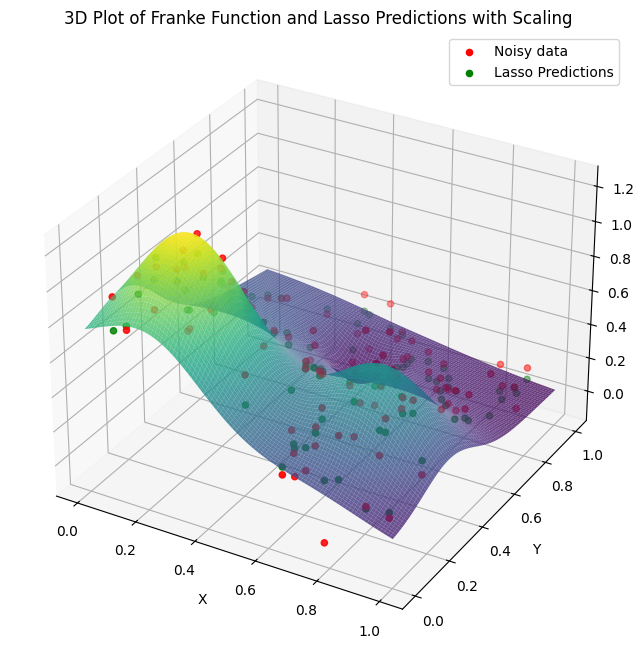

In [10]:
X = np.column_stack((x, y))  # remember that z = f(x,y)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=42)

# Scaling only on X (xy)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1))
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1))

# Model
best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train__Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_poly, z_train_scaled, lambdas)
model_Lasso = Lasso(alpha = best_alpha, fit_intercept=False)
model_Lasso.fit(X_train_poly, z_train_scaled)

z_train_pred_scaled = model_Lasso.predict(X_train_poly)
z_test_pred_scaled = model_Lasso.predict(X_test_poly)

# Re-scaling
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1)).ravel()
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1)).ravel()

# eval
train_mse, train_r2 = mse_and_r2_sk(z_train_scaled, z_train_pred)
test_mse, test_r2 = mse_and_r2_sk(z_test_scaled, z_test_pred)
print(f"Best Alpha: {best_alpha}")
print(f"\nTrain MSE: {train_mse:.5f} \nTrain R²:  {train_r2:.5f}")
print(f"\nTest MSE: {test_mse:.5f} \nTest R²:  {test_r2:.5f}")


# --------------------------------- Plot results ---------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z_surf = FrankeFunction(x_surf, y_surf)
ax.plot_surface(x_surf, y_surf, z_surf, cmap='viridis', alpha=0.8, rstride=1, cstride=1)
ax.scatter(X_test[:, 0], X_test[:, 1], z_test, color='r', label='Noisy data')
ax.scatter(X_test[:, 0], X_test[:, 1], z_test_pred, color='g', label='Lasso Predictions')
ax.set_title('3D Plot of Franke Function and Lasso Predictions with Scaling', fontsize=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

Degree: 1 	Train MSE: 0.8504 	Test MSE: 0.9600 	Train R²: 0.1496 	Test R²: 0.1785 	Alpha: -1.32
Degree: 2 	Train MSE: 0.7974 	Test MSE: 0.9001 	Train R²: 0.2026 	Test R²: 0.2297 	Alpha: -1.84
Degree: 3 	Train MSE: 0.7404 	Test MSE: 0.8261 	Train R²: 0.2596 	Test R²: 0.2931 	Alpha: -5.0
Degree: 4 	Train MSE: 0.7243 	Test MSE: 0.7912 	Train R²: 0.2757 	Test R²: 0.3229 	Alpha: -5.0
Degree: 5 	Train MSE: 0.7233 	Test MSE: 0.7879 	Train R²: 0.2767 	Test R²: 0.3258 	Alpha: -2.37
Degree: 6 	Train MSE: 0.7080 	Test MSE: 0.7624 	Train R²: 0.2920 	Test R²: 0.3476 	Alpha: -5.0
Degree: 7 	Train MSE: 0.7069 	Test MSE: 0.7608 	Train R²: 0.2931 	Test R²: 0.3490 	Alpha: -3.42
Degree: 8 	Train MSE: 0.7087 	Test MSE: 0.7632 	Train R²: 0.2913 	Test R²: 0.3469 	Alpha: -2.89
Degree: 9 	Train MSE: 0.7066 	Test MSE: 0.7630 	Train R²: 0.2934 	Test R²: 0.3470 	Alpha: -2.89
Degree: 10 	Train MSE: 0.7064 	Test MSE: 0.7623 	Train R²: 0.2936 	Test R²: 0.3477 	Alpha: -2.89
Degree: 11 	Train MSE: 0.7062 	Test MSE: 0

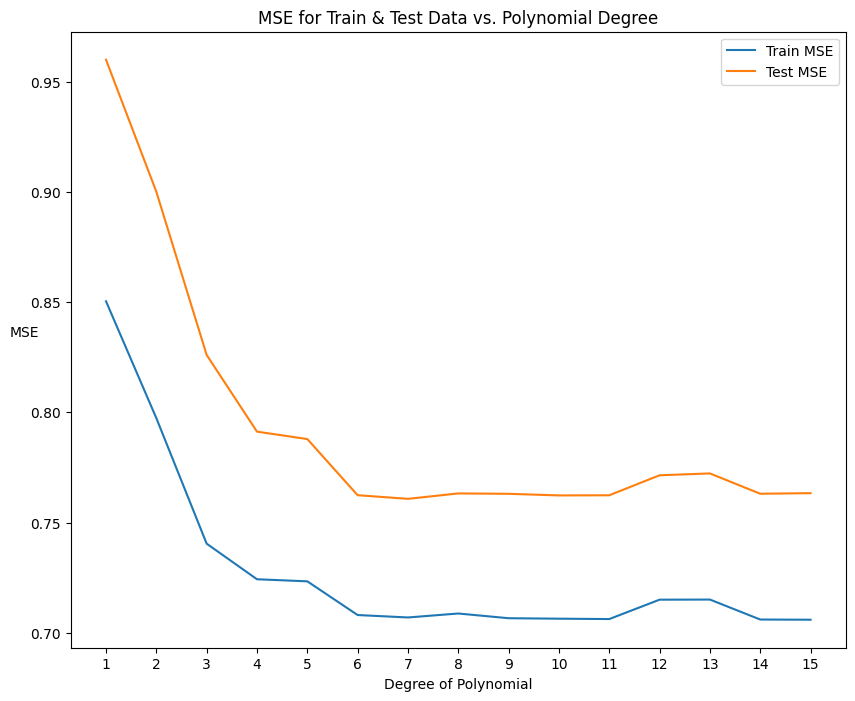

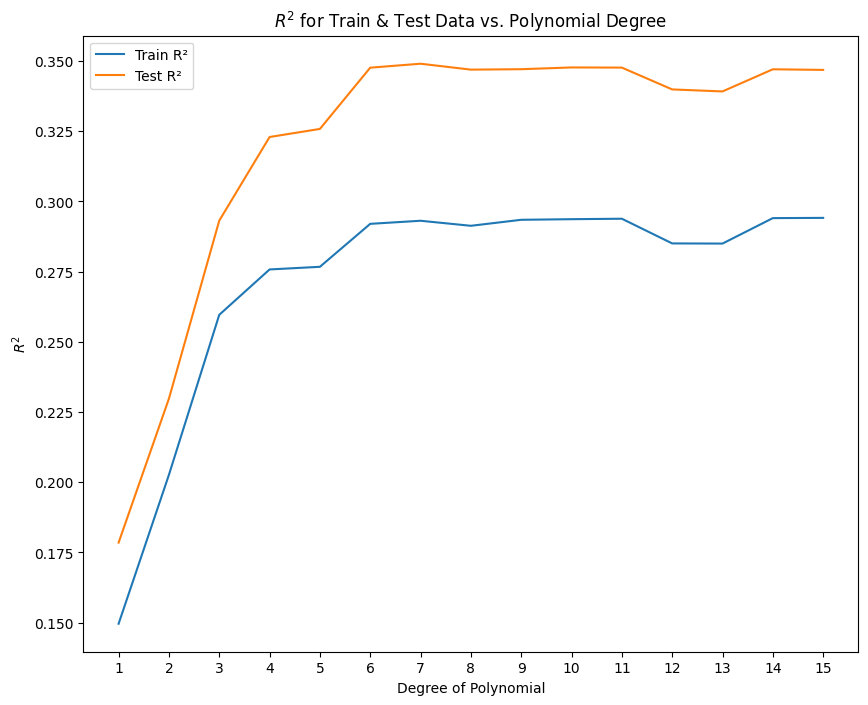

In [11]:
mse_train_values_Lasso = np.zeros(max_degree)
mse_test_values_Lasso = np.zeros(max_degree)
r2_train_values_Lasso = np.zeros(max_degree)
r2_test_values_Lasso = np.zeros(max_degree)
best_alpha_log = np.zeros(max_degree)

X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=10)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1))
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1))

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train__Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_poly, z_train_scaled, lambdas)
    model_Lasso = Lasso(alpha = best_alpha, fit_intercept=False)
    model_Lasso.fit(X_train_poly, z_train_scaled)
    
    z_train_pred_scaled = model_Lasso.predict(X_train_poly)
    z_test_pred_scaled = model_Lasso.predict(X_test_poly)
    
    # Re-scaling
    z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1)).ravel()
    z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1)).ravel()
    
    mse_train, r2_train = mse_and_r2_sk(z_train_scaled, z_train_pred)
    mse_test, r2_test = mse_and_r2_sk(z_test_scaled, z_test_pred)
    
    mse_train_values_Lasso[degree - 1] = (mse_train)
    mse_test_values_Lasso[degree - 1] = (mse_test)
    r2_train_values_Lasso[degree - 1] = (r2_train)
    r2_test_values_Lasso[degree - 1] = (r2_test)
    best_alpha_log [degree - 1] = np.log10(best_alpha).round(2)
    
    print(f"Degree: {degree} \tTrain MSE: {mse_train_values_Lasso[degree-1]:.4f} \tTest MSE: {mse_test_values_Lasso[degree-1]:.4f} \tTrain R²: {r2_train_values_Lasso[degree-1]:.4f} \tTest R²: {r2_test_values_Lasso[degree-1]:.4f} \tAlpha: {best_alpha_log[degree-1]}")

best_degree = np.argmin(mse_test_values_Lasso)
alpha = best_alpha_log[best_degree]
MSE = mse_test_values_Lasso[best_degree]
print(f"\nThe best combination is obtained with Degree = {best_degree + 1} and an alpha value = {alpha}, we obtain an MSE test of {MSE:.4f}")


# --------------------------------- Plot results ---------------------------------
# Plotting MSE Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), mse_train_values_Lasso, label='Train MSE')
plt.plot(range(1, max_degree + 1), mse_test_values_Lasso, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE', rotation = 0)
plt.xticks(ticks=range(1, max_degree + 1))
plt.title('MSE for Train & Test Data vs. Polynomial Degree')
plt.legend()
plt.show()

# Plotting R2 Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), r2_train_values_Lasso, label='Train R²')
plt.plot(range(1, max_degree + 1), r2_test_values_Lasso, label='Test R²')
plt.xlabel('Degree of Polynomial')
plt.ylabel(r"$R^2$")
plt.xticks(ticks=range(1, max_degree + 1))
plt.title(r"$R^2$" + f' for Train & Test Data vs. Polynomial Degree')
plt.legend()
plt.show()

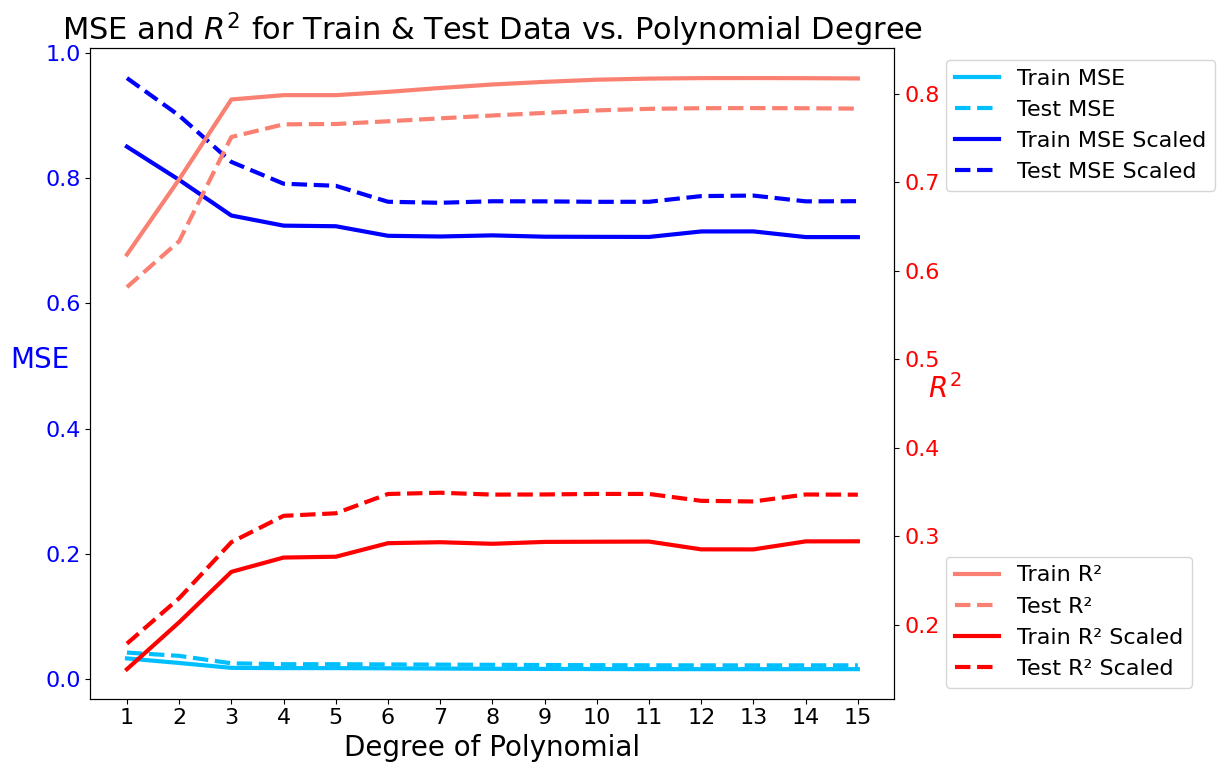

In [12]:
plt.rcParams.update({
    "font.size": 16,             
    "axes.labelsize": 20,        
    "xtick.labelsize": 16,       
    "ytick.labelsize": 16,       
    "legend.fontsize": 16,       
    "lines.linewidth": 3,        
})

fig, ax1 = plt.subplots(figsize=(10, 8))

color1 = 'deepskyblue'
color = 'blue'
ax1.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE ', color=color1)
ax1.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE', linestyle='--', color=color1)
ax1.plot(range(1, max_degree + 1), mse_train_values_Lasso, label='Train MSE Scaled', color=color)
ax1.plot(range(1, max_degree + 1), mse_test_values_Lasso, label='Test MSE Scaled', linestyle='--', color=color)
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('MSE', color=color, rotation = 0)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1, max_degree + 1))

ax2 = ax1.twinx()
color1 = 'salmon'
color = 'red'
ax2.plot(range(1, max_degree + 1), r2_train_values, label='Train R²', color=color1)
ax2.plot(range(1, max_degree + 1), r2_test_values, label='Test R²', linestyle='--', color=color1)
ax2.plot(range(1, max_degree + 1), r2_train_values_Lasso, label='Train R² Scaled', color=color)
ax2.plot(range(1, max_degree + 1), r2_test_values_Lasso, label='Test R² Scaled', linestyle='--', color=color)
ax2.set_ylabel(r"$R^2$", color=color, rotation = 0)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('MSE and '+ r"$R^2$" + f' for Train & Test Data vs. Polynomial Degree', fontsize=22)
fig.tight_layout() 
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0))

plt.savefig("/Users/elisaottoboni/Desktop/Images/mse_r2_plot_Lasso.pdf", format='pdf', bbox_inches='tight')
plt.show()

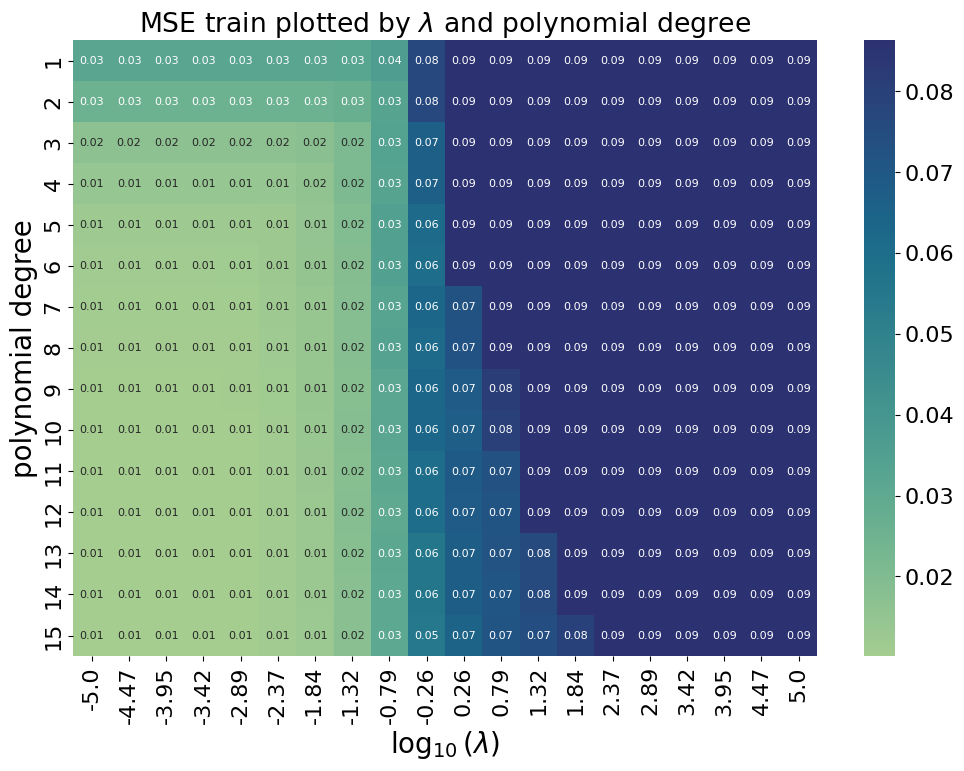

In [13]:
mse_train_values_d = np.zeros((max_degree, len(lambdas)))
mse_test_values_d = np.zeros((max_degree, len(lambdas)))
r2_train_values_d = np.zeros((max_degree, len(lambdas)))
r2_test_values_d = np.zeros((max_degree, len(lambdas)))

X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=10)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

# Loop iteration
for l in range(len(lambdas)):
    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree = degree)
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_test_poly = poly.transform(X_test_scaled)
        
        model_d = Lasso(alpha = lambdas[l], fit_intercept=False)
        model_d.fit(X_train_poly, z_train_scaled)
        
        z_train_pred_scaled = model_d.predict(X_train_poly)
        z_test_pred_scaled = model_d.predict(X_test_poly)
        
        # Re-scaling
        z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1)).ravel()
        z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1)).ravel()
        
        mse_train, r2_train = mse_and_r2_sk(z_train, z_train_pred)
        mse_test, r2_test = mse_and_r2_sk(z_test, z_test_pred)
        
        mse_train_values_d[degree - 1, l] = mse_train
        mse_test_values_d[degree - 1, l] = mse_test
        r2_train_values_d[degree - 1, l] = r2_train
        r2_test_values_d[degree - 1, l] = r2_test
        
        lambdas_labels = np.log10(lambdas).round(2)

# --------------------------------- Plot results ---------------------------------
polynomial_degrees_list = list(range(1, 16))
plt.figure(figsize=(12, 8))
fig = sns.heatmap(mse_train_values_d, xticklabels=lambdas_labels, yticklabels=polynomial_degrees_list, cmap="crest", annot=True, fmt=".2f", annot_kws={"size": 8})
fig.set(xlabel=r'$\log_{10}(\lambda)$', ylabel="polynomial degree", title="MSE train plotted by "+r'$\lambda$'+" and polynomial degree")
plt.savefig("/Users/elisaottoboni/Desktop/Images/mse_train_heatmap_d.pdf", format='pdf', bbox_inches='tight')
plt.show()

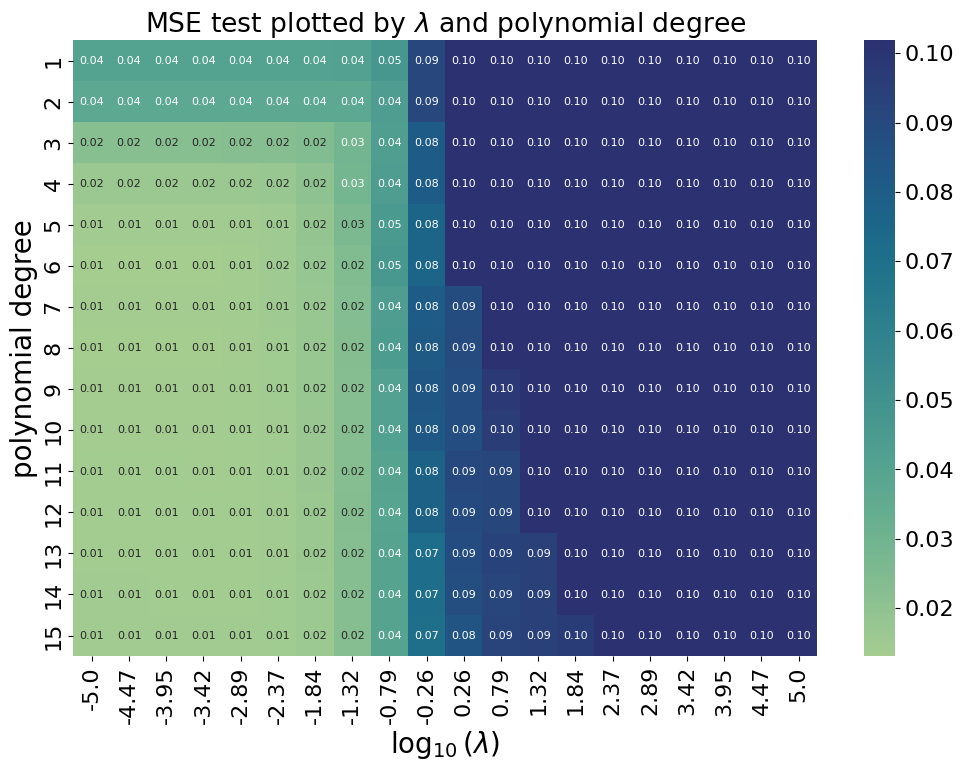

In [14]:
plt.figure(figsize=(12, 8))
fig = sns.heatmap(mse_test_values_d, xticklabels=lambdas_labels, yticklabels=polynomial_degrees_list, cmap="crest", annot=True, fmt=".2f", annot_kws={"size": 8})
fig.set(xlabel=r'$\log_{10}(\lambda)$', ylabel="polynomial degree", title="MSE test plotted by "+r'$\lambda$'+" and polynomial degree")
plt.savefig("/Users/elisaottoboni/Desktop/Images/mse_test_heatmap_d.pdf", format='pdf', bbox_inches='tight')
plt.show()

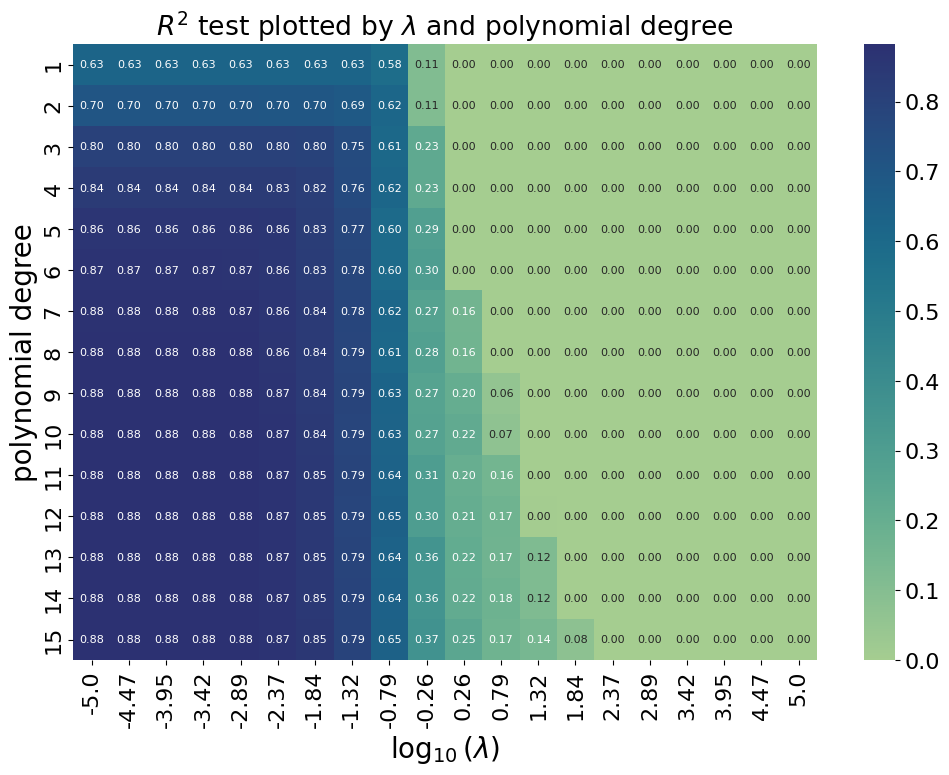

In [15]:
plt.figure(figsize=(12, 8))
fig = sns.heatmap(r2_train_values_d, xticklabels=lambdas_labels, yticklabels=polynomial_degrees_list, cmap="crest", annot=True, fmt=".2f", annot_kws={"size": 8})
fig.set(xlabel=r'$\log_{10}(\lambda)$', ylabel="polynomial degree", title=r"$R^2$" + f" test plotted by "+r'$\lambda$'+" and polynomial degree")
plt.savefig("/Users/elisaottoboni/Desktop/Images/r2_train_heatmap_d.pdf", format='pdf', bbox_inches='tight')
plt.show()

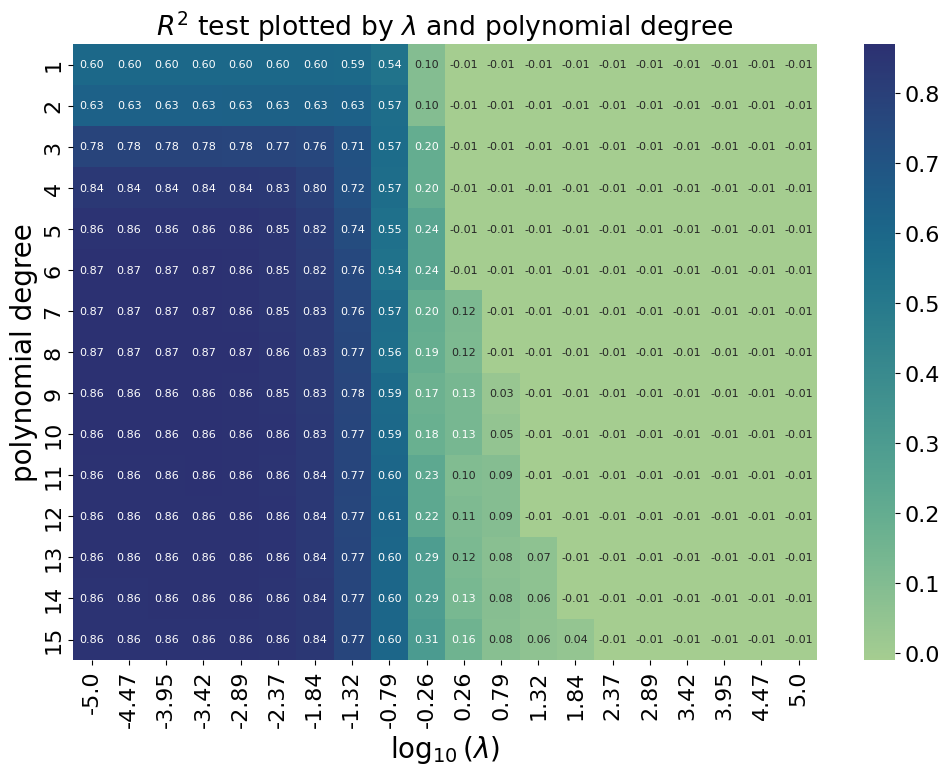

In [16]:
plt.figure(figsize=(12, 8))
fig = sns.heatmap(r2_test_values_d, xticklabels=lambdas_labels, yticklabels=polynomial_degrees_list, cmap="crest", annot=True, fmt=".2f", annot_kws={"size": 8})
fig.set(xlabel=r'$\log_{10}(\lambda)$', ylabel="polynomial degree", title=r"$R^2$" + f" test plotted by "+r'$\lambda$'+" and polynomial degree")
plt.savefig("/Users/elisaottoboni/Desktop/Images/r2_test_heatmap_d.pdf", format='pdf', bbox_inches='tight')
plt.show()

### Comparison about the methods

In [17]:
# Function to determine the best lambdas with Ridge Regression

def best_lambdas_Ridge(X_train_val, z_train_val, lambdas):
    X_train, X_validation, z_train, z_validation = train_test_split(X_train_val, z_train_val, test_size=0.1, random_state=10)
    MSE_train_Ridge = []
    MSE_test_Ridge = []
    R2_train_Ridge = []
    R2_test_Ridge = []
    
    for l in range(len(lambdas)):
        model_Ridge = Ridge(lambdas[l], fit_intercept=False)
        model_Ridge.fit(X_train, z_train)
        z_train_pred_Ridge = model_Ridge.predict(X_train)
        z_test_pred_Ridge = model_Ridge.predict(X_validation)
        
        mse_train, r2_train = mse_and_r2_sk(z_train, z_train_pred_Ridge)
        mse_validation, r2_validation = mse_and_r2_sk(z_validation, z_test_pred_Ridge)
        
        MSE_train_Ridge.append(mse_train)
        MSE_test_Ridge.append(mse_validation)
        R2_train_Ridge.append(r2_train)
        R2_test_Ridge.append(r2_validation)
    
    best_index = np.argmin(MSE_test_Ridge)
    best_alpha_Ridge = lambdas[best_index]
    min_MSE = MSE_test_Ridge[best_index]
    return best_alpha_Ridge, min_MSE, MSE_train_Ridge, MSE_test_Ridge, R2_train_Ridge, R2_test_Ridge

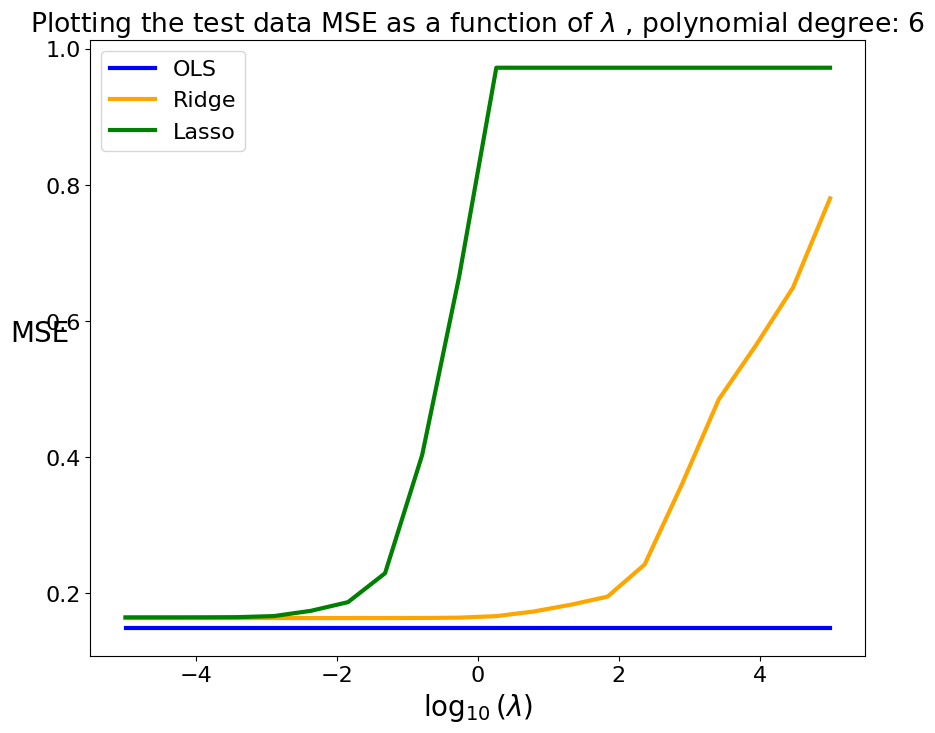

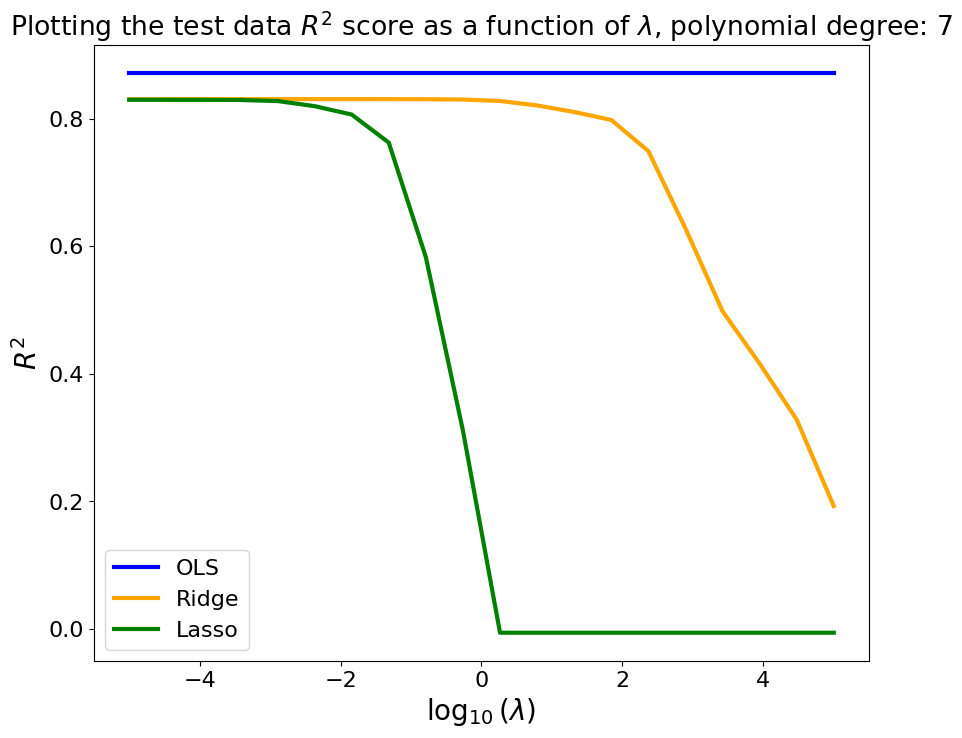

In [18]:
degree = best_degree

X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1, random_state=10)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

poly = PolynomialFeatures(degree = degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
# --------------------------------- OLS ---------------------------------
model = LinearRegression()
model.fit(X_train_poly, z_train_scaled)
z_train_pred = model.predict(X_train_poly)
z_test_pred = model.predict(X_test_poly)

MSE_train_OLS = mean_squared_error(z_train_scaled, z_train_pred)
MSE_test_OLS = mean_squared_error(z_test_scaled, z_test_pred)
R2_train_OLS = r2_score(z_train_scaled, z_train_pred)
R2_test_OLS = r2_score(z_test_scaled, z_test_pred)

# --------------------------------- Ridge ---------------------------------
best_alpha_Ridge, min_MSE, MSE_train_Ridge, MSE_test_Ridge, R2_train_Ridge, R2_test_Ridge = best_lambdas_Ridge(X_train_poly, z_train_scaled, lambdas)

# --------------------------------- Lasso ---------------------------------
best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train__Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_poly, z_train_scaled, lambdas)

# --------------------------------- Plot results ---------------------------------
# Plotting MSE Train
plt.figure(figsize=(10, 8))
plt.plot(np.log10(lambdas), np.ones(len(lambdas)) * MSE_test_OLS, 'b-', label='OLS')
plt.plot(np.log10(lambdas), MSE_test_Ridge, 'orange', label='Ridge')
plt.plot(np.log10(lambdas), MSE_test_Lasso, 'g-', label = 'Lasso')
plt.xlabel(r'$\log_{10}(\lambda)$')
plt.ylabel('MSE', rotation = 0)
plt.title("Plotting the test data MSE as a function of " + r'$\lambda$' + f" , polynomial degree: {degree}")
plt.legend()
plt.savefig("/Users/elisaottoboni/Desktop/Images/MSE_OLSvsRidgevsLasso.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Plotting R2 Test
plt.figure(figsize=(10, 8))
plt.plot(np.log10(lambdas), np.ones(len(lambdas)) * R2_test_OLS, 'b-', label='OLS')
plt.plot(np.log10(lambdas), R2_test_Ridge, 'orange', label='Ridge')
plt.plot(np.log10(lambdas), R2_test_Lasso, 'g-', label='Lasso')
plt.xlabel(r'$\log_{10}(\lambda)$')
plt.ylabel(r"$R^2$")
plt.title("Plotting the test data " + r"$R^2$" + " score as a function of " + r'$\lambda$' + f", polynomial degree: {degree+1}")
plt.legend()
plt.savefig("/Users/elisaottoboni/Desktop/Images/R2_OLSvsRidgevsLasso.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [19]:
max_degree = 15
# Split
X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=10)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

# --------------------------------- OLS ---------------------------------
# Initializing arrays
mse_train_values_OLS = np.zeros(max_degree)
mse_test_values_OLS = np.zeros(max_degree)
r2_train_values_OLS = np.zeros(max_degree)
r2_test_values_OLS = np.zeros(max_degree)

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, z_train)

    # Predictions
    z_train_pred = model.predict(X_train_poly)
    z_test_pred = model.predict(X_test_poly)
    
    mse_train, r2_train = mse_and_r2_sk(z_train, z_train_pred)
    mse_test, r2_test = mse_and_r2_sk(z_test, z_test_pred)

    mse_train_values_OLS[degree - 1] = mse_train
    mse_test_values_OLS[degree - 1] = mse_test
    r2_train_values_OLS[degree - 1] = r2_train
    r2_test_values_OLS[degree - 1] = r2_test
    
# --------------------------------- Ridge ---------------------------------
mse_train_values_Ridge = np.zeros(max_degree)
mse_test_values_Ridge = np.zeros(max_degree)
r2_train_values_Ridge = np.zeros(max_degree)
r2_test_values_Ridge = np.zeros(max_degree)

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Model
    best_alpha, min_MSE, MSE_train_Ridge, MSE_test_Ridge, R2_train_Ridge, R2_test_Ridge = best_lambdas_Lasso(X_train_poly, z_train_scaled, lambdas)
    model_Ridge = Lasso(alpha = best_alpha, fit_intercept=False)
    model_Ridge.fit(X_train_poly, z_train_scaled)

    z_train_pred_scaled = model_Ridge.predict(X_train_poly)
    z_test_pred_scaled = model_Ridge.predict(X_test_poly)

    # Re-scaling
    z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1)).ravel()
    z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1)).ravel()

    mse_train, r2_train = mse_and_r2_sk(z_train_scaled, z_train_pred)
    mse_test, r2_test = mse_and_r2_sk(z_test_scaled, z_test_pred)
    
    mse_train_values_Ridge[degree - 1] = mse_train
    mse_test_values_Ridge[degree - 1] = mse_test
    r2_train_values_Ridge[degree - 1] = r2_train
    r2_test_values_Ridge[degree - 1] = r2_test

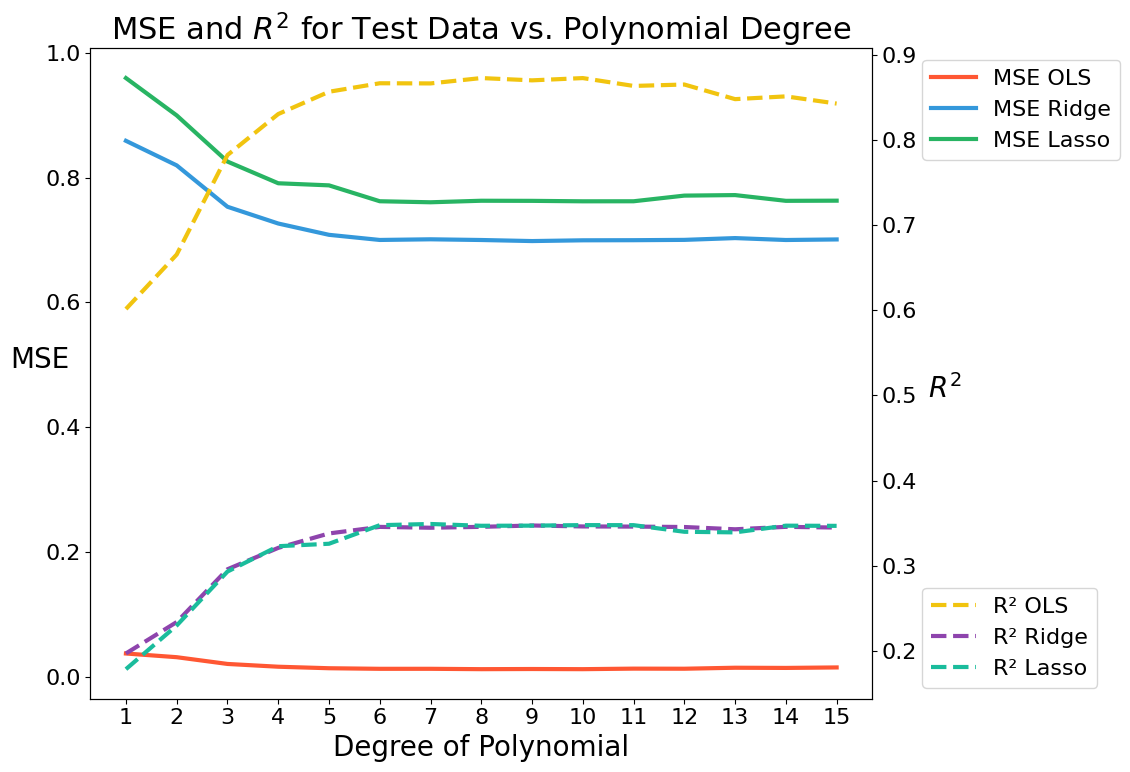

In [20]:
plt.rcParams.update({
    "font.size": 16,             
    "axes.labelsize": 20,        
    "xtick.labelsize": 16,       
    "ytick.labelsize": 16,       
    "legend.fontsize": 16,       
    "lines.linewidth": 3,        
})

fig, ax1 = plt.subplots(figsize=(10, 8))

colors = ['#FF5733', '#3498DB', '#28B463', '#F1C40F', '#8E44AD', '#1ABC9C']
color1 = 'deepskyblue'
color2 = 'red'
color3 = 'blue'
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('MSE', color='black', rotation= 0)
ax1.plot(range(1, max_degree + 1), mse_test_values_OLS, label='MSE OLS', color=colors[0])
ax1.plot(range(1, max_degree + 1), mse_test_values_Ridge, label='MSE Ridge', color=colors[1])
ax1.plot(range(1, max_degree + 1), mse_test_values_Lasso, label='MSE Lasso', color=colors[2])
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(1, max_degree + 1))

ax2 = ax1.twinx()
ax2.set_ylabel(r"$R^2$", color='black', rotation= 0, labelpad=20)
ax2.plot(range(1, max_degree + 1), r2_test_values_OLS, label='R² OLS', linestyle='--', color=colors[3])
ax2.plot(range(1, max_degree + 1), r2_test_values_Ridge, label='R² Ridge', linestyle='--', color=colors[4])
ax2.plot(range(1, max_degree + 1), r2_test_values_Lasso, label='R² Lasso', linestyle='--', color=colors[5])
ax2.tick_params(axis='y', labelcolor='black')
# ax2.set_ylim(0, 1.1)

plt.title(f'MSE and '+ r"$R^2$" + f' for Test Data vs. Polynomial Degree', fontsize=22)
fig.tight_layout() 
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0))

plt.savefig("/Users/elisaottoboni/Desktop/Images/MSEandR2_OLSvsRidgevsLasso.pdf", format='pdf', bbox_inches='tight')
plt.show()

### Part e): Bias-variance trade-off and resampling techniques

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.
**We will only use the simpler ordinary least squares here**.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

As in part d), we assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this in terms of a term which contains the variance of the model itself (the so-called variance term), a
term which measures the deviation from the true data and the mean value of the model (the bias term) and finally the variance of the noise.
That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

The answer to this exercise should be included in the theory part of the report.  This exercise is also part of the weekly exercises of week 38.
Explain what the terms mean and discuss their interpretations.

Perform then a bias-variance analysis of the Franke function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

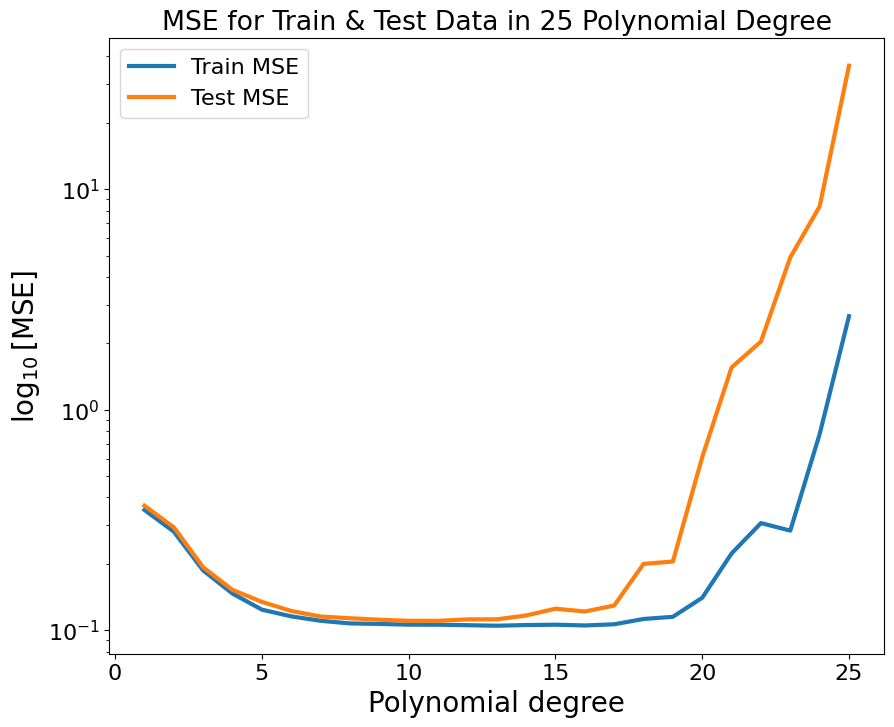

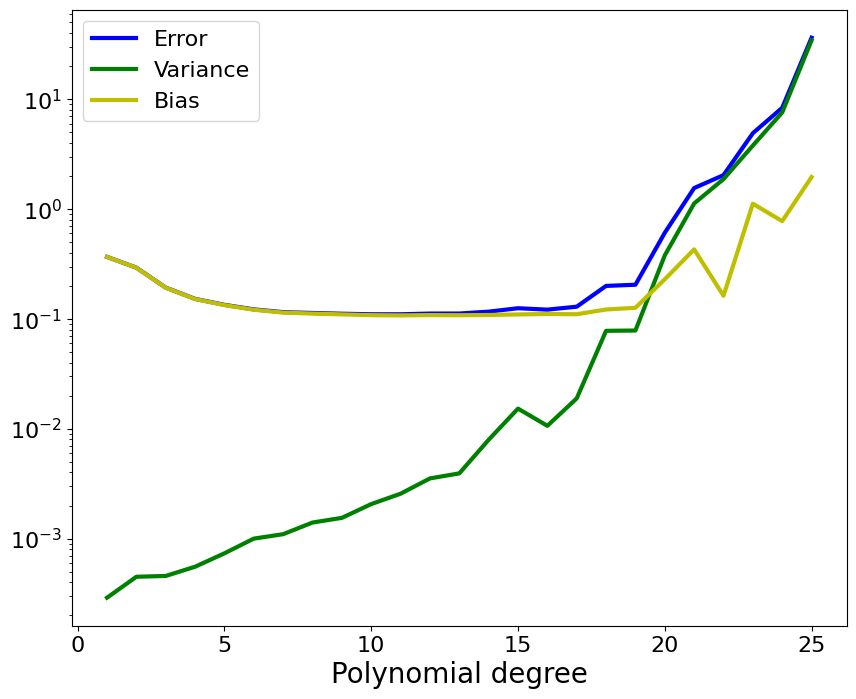

In [21]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


np.random.seed(2745)
n = 5000 # --> we add stochastic noise using a normal distrib. N(0,1)
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + 0.1 * np.random.normal(0, 1, n)

n_boostraps = 100
max_degree = 25
lambdas = np.logspace(-5, 5, 20) 

MSE_train_values = np.zeros(max_degree)
MSE_test_values = np.zeros(max_degree)
error = np.zeros(max_degree)
bias = np.zeros(max_degree)
variance = np.zeros(max_degree)

X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=10)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1))
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1))

for degree in range(1, max_degree + 1):
    model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression(fit_intercept = False))
    z_train_pred = np.empty((z_train_scaled.shape[0], n_boostraps))
    z_test_pred = np.empty((z_test_scaled.shape[0], n_boostraps))

    for j in range(n_boostraps):
        new_x_, new_z_ = resample(X_train_scaled, z_train_scaled)
        model.fit(new_x_, new_z_)
        z_train_pred[:, j] = model.predict(X_train_scaled).ravel()
        z_test_pred[:, j] = model.predict(X_test_scaled).ravel()

    error[degree - 1] = np.mean(np.mean((z_test_scaled - z_test_pred)**2, axis=1, keepdims=True))
    bias[degree - 1] = np.mean((z_test_scaled - np.mean(z_test_pred, axis=1, keepdims=True))**2)
    variance[degree - 1] = np.mean(np.var(z_test_pred, axis=1, keepdims=True))
    
    MSE_train_values[degree - 1] = MSE(z_train_scaled, z_train_pred)
    MSE_test_values[degree - 1] = MSE(z_test_scaled, z_test_pred)


plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), MSE_train_values, label='Train MSE')
plt.plot(range(1, max_degree + 1), MSE_test_values, label='Test MSE')
plt.xlabel('Polynomial degree')
plt.ylabel(r'$\log_{10}[\operatorname{MSE}]$')
plt.yscale('log')
plt.title(f'MSE for Train & Test Data in {max_degree} Polynomial Degree')
plt.legend()
plt.savefig("/Users/elisaottoboni/Desktop/Images/mse_r2_BVOF.pdf", format='pdf', bbox_inches='tight')

plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), error, 'b', label='Error')
plt.plot(range(1, max_degree + 1), variance, 'g', label='Variance')
plt.plot(range(1, max_degree + 1), bias, 'y', label='Bias')
plt.xlabel("Polynomial degree")
plt.yscale('log')
plt.legend()
plt.savefig("/Users/elisaottoboni/Desktop/Images/BVOF.pdf", format='pdf', bbox_inches='tight')
plt.show()